# Import Necessary  Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Bringing in Dataset


**Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.**

In [2]:
# filename = 'https://drive.google.com/file/d/1hlKNN1rRuhlYf4kmnXgnt8ow8aLwMQfJ/view' # couldn't see the info method return with this link
filename = './employee_attrition.csv'
ea_df = pd.read_csv(filename)
ea_df.info()
ea_df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,NaN,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,NaN,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,NaN,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,NaN,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Exploring the data


---

1) The first step in this process is to use Python to clean the data to get it ready for analysis.


In [3]:
ea_df.shape

(1470, 35)

Determining how much missed data there is throught this visualization method https://github.com/ResidentMario/missingno

<Axes: >

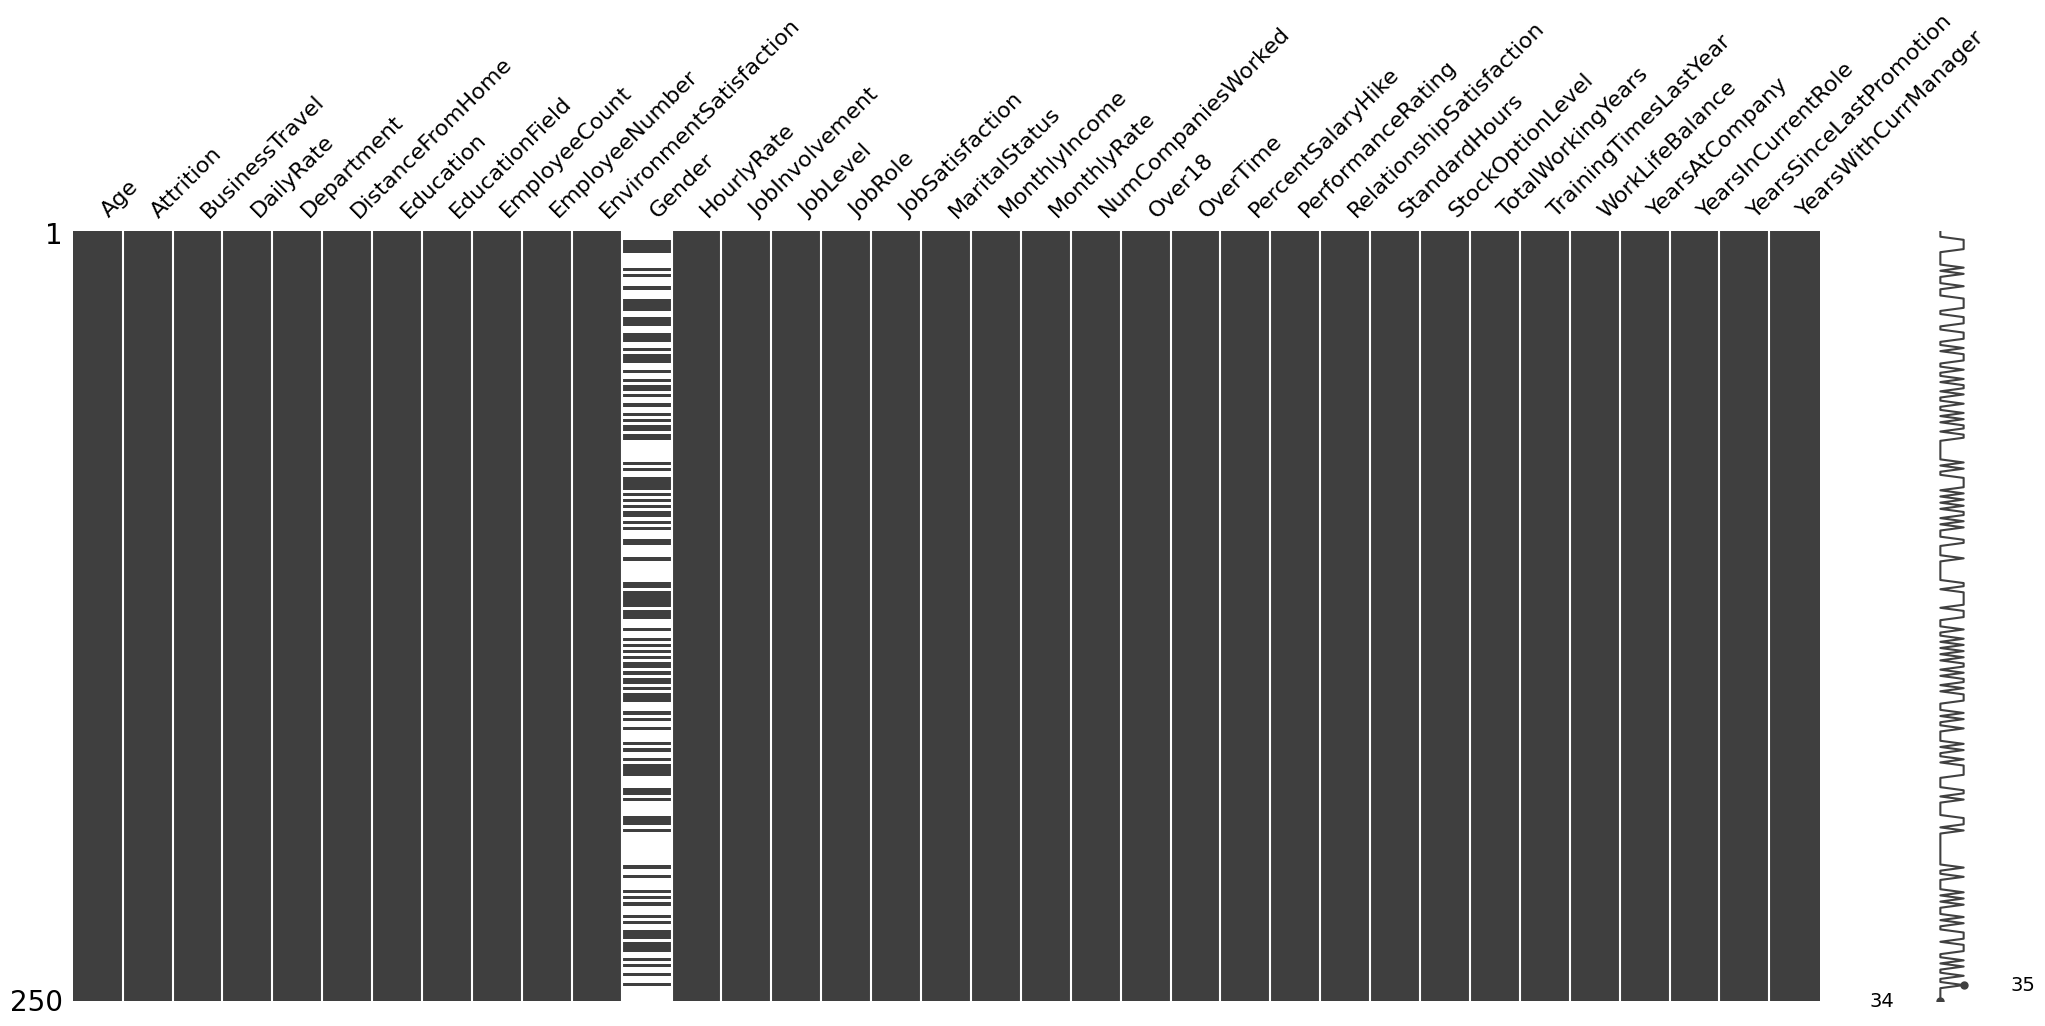

In [4]:
#
%matplotlib inline
msno.matrix(ea_df.sample(250))

This function was manually created through the inspiration of this resource: https://www.kaggle.com/code/alexisbcook/handling-missing-values . Determining how uch missed data per column is crucial to dropping or filling in. 

In [5]:
def check_df_null_percentage(df):
    missing_values_count= df.isna().sum()
    total_cells = np.product(df.shape)
    total_missing = missing_values_count.sum()
    percent_missing = (total_missing/total_cells) * 100
    total_rows = df.shape[0]
    # created percentage null checks for each row 
    for col in df:
        series = df[col]
        each_series_null_values = series.isna().sum()
        percentage_each_series = (each_series_null_values/total_rows) * 100
        percentage_each_series_df  = (each_series_null_values/total_cells) * 100
        text = (
            f'''Series column {col} has {each_series_null_values} missing values which is 
            {percentage_each_series.round(decimals=2)} % of row data or 
            {percentage_each_series_df.round(decimals=2)} of the whole dataset'''
        )
        print(text)
    print(f"There is {percent_missing.round(decimals=2)}% missing data in your dataset" )

In [6]:
check_df_null_percentage(ea_df)

Series column Age has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Attrition has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column BusinessTravel has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column DailyRate has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Department has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column DistanceFromHome has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column Education has 0 missing values which is 
            0.0 % of row data or 
            0.0 of the whole dataset
Series column EducationField has 0 missing values which is 
            0.0 % of row data or 
            0.0 o

In [7]:
ea_df['Gender'].unique()

array(['Female', nan], dtype=object)

Initial Observations of Dataset
1. It appears that we have 1470 rows and 35 columns
2. The only missing values detected are in the Gender column.
3. Also, it looks like only female responses were not null

---
**Identify and address any missing values in this dataset. Deal with these appropriately. Include a brief description of the method you used to deal with missing values along with a justification for that method.**

Due to only female response not being null, it would be better to fill in missing data first and then drop any duplicates. Based on my function above, it seems that 60% of row data is NaN. Though, it would be justified to drop the whole column, it would be important to get male employees perspective on employee attrition.It is reasonable to assume that the missing values are males since no male responses were present. 




In [8]:
ea_df['Gender'].fillna('Male', inplace=True)

In [9]:
ea_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [10]:
# checking to make sure no more NA values
ea_df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Check for duplicates

**Identify and address any duplicate values**

---

There are no duplicates

In [11]:
ea_df.duplicated().sum()

0

This function checks for extra spaces in dataset

In [12]:
def cleanStringData(df):
    df = df.replace(r'\r+|\n+|\t+|\(+|\)+|','', regex=True)
    new_df = pd.DataFrame()
    for col in df:
        series = df[col]
        # check column data type
        if series.dtype == 'object':
            series = series.str.strip() #removes leading and trailing spaces
            # series = series.str.replace(" ", "") #this removes all spaces 
            new_df[col] = series
        else:
            new_df[col] = series
    return new_df

In [13]:
cleanStringData(ea_df.head(10))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Checking for inconsistent  data

---
1. Identify and address any inconsistencies in categorical values 
2. Identify and address any inappropriate or unusual data points 


---
It appears all data is consistent


This function checks for any inconsistent values per column

In [14]:
def check_inconsistent_values(df):
    for col in df:
        series = df[col]
        print(f" Series -->{col} unique values are {series.unique()} \n")
   

In [15]:
check_inconsistent_values(ea_df)

 Series -->Age unique values are [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

 Series -->Attrition unique values are ['Yes' 'No'] 

 Series -->BusinessTravel unique values are ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

 Series -->DailyRate unique values are [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  59

# Checking for Data Types
---
**Ensure all columns match the data types listed in the data dictionary.**

---
Upon closer observation, it appears that the "YearsAtCompany' is an object and should be an int. Also, it looks like a non int character is present. 


In [16]:
ea_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [17]:
# first remove non-int characters using replace and regex
ea_df['YearsAtCompany'] = ea_df['YearsAtCompany'].str.replace(r'[^0-9]', '', regex=True)
ea_df['YearsAtCompany'] = ea_df['YearsAtCompany'].astype(int)
ea_df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23])

Dropping columns Reasons 
* "EmployeeCount" only output was 1
* "StandardHours" becuase it seems to be not adding insight to our data.
* "MonthlyRate" is more important for HR and not employee attrition. Monthly rate is the internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc [Resource](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion/139552).
* "Over18" All Employees seem to be over 18

In [18]:
ea_df = ea_df.drop(['EmployeeCount','StandardHours', 'MonthlyRate', 'Over18'], axis=1) 

The company's age range is between 18 and 60 years old. However, most of their workforce is between 30 and 42 years with an average age of around 36. 

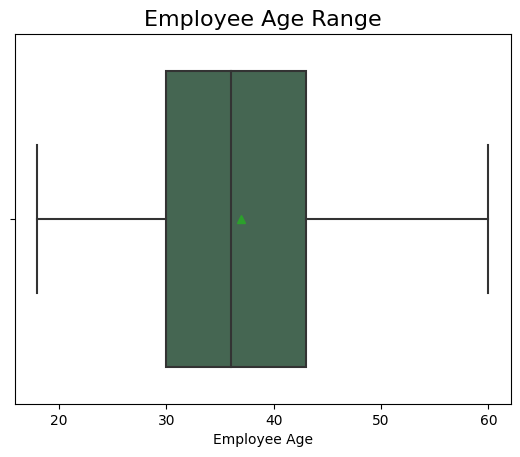

In [19]:
sns.boxplot(ea_df, x ='Age', color='#3F6C51', showmeans=True)
#add overall title
plt.title('Employee Age Range', fontsize=16)
#add axis titles
plt.xlabel('Employee Age')
plt.show()

Most employees have been working at the company for 3-9 years. 

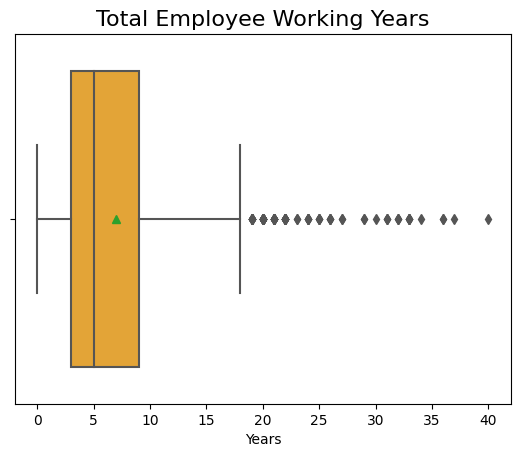

In [20]:
sns.boxplot(ea_df, x ='YearsAtCompany', color='#FFAC1B', showmeans=True)
#add overall title
plt.title('Total Employee Working Years', fontsize=16)
#add axis titles
plt.xlabel('Years')
plt.show()

The company's monthly income for employees appears to be around 1.5K to 20k, where most of the ranges were around 2.5K. 

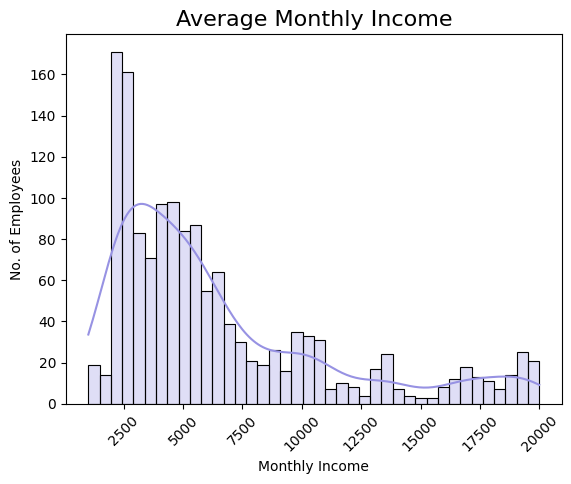

In [21]:
sns.histplot(ea_df, x='MonthlyIncome', bins =40, color='#9792E3', alpha = .3, kde=True)
#add overall title
plt.title('Average Monthly Income', fontsize=16)
#add axis titles
plt.xlabel('Monthly Income')
plt.ylabel('No. of Employees')
#rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

This graph shows that almost 20 percent of employees ranked their job satisfaction low. However, over 60% ranked their job satisfaction either as High or Very High.

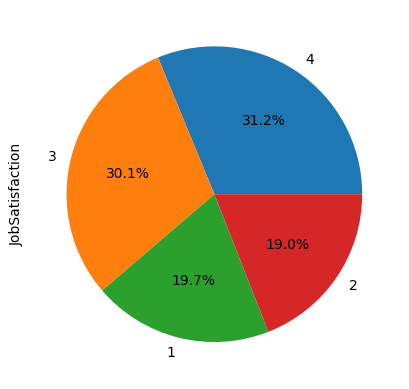

In [22]:
palette_color = sns.color_palette('bright')
# plotting data on chart
g_data =ea_df['JobSatisfaction'].value_counts()
g_data.plot.pie(autopct="%.1f%%")
# displaying chart
plt.show()

The graph below appears to show that employees who made lower monthly income left the company than those who had a higher monthly income. When factoring in gender to see if one gender was more likely to leave the company. There seemed to be no significant difference for lower monthly income. However, there seems to be a gap for higher income. 

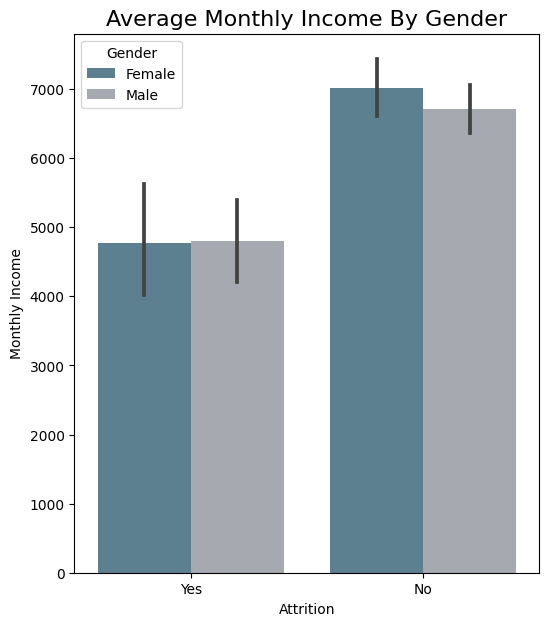

In [23]:
# sns.set(style = "darkgrid")
fig, ax = plt.subplots(figsize=(6, 7))
sns.barplot(ea_df, y='MonthlyIncome', x='Attrition', hue='Gender', alpha= .7, palette=['#0B4F6C', '#7D8491'], ax=ax )
#add overall title
plt.title('Average Monthly Income By Gender', fontsize=16)
#add axis titles
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

plt.show()

Check the mean of monthly income while filtering in attrition

In [24]:
filter_yes = ea_df['Attrition'] == 'Yes' 
filter_no = ea_df['Attrition'] == 'No'

In [25]:
ea_df.loc[filter_yes]['MonthlyIncome'].mean()

4787.0928270042195

In [26]:
ea_df.loc[filter_no]['MonthlyIncome'].mean()

6832.739659367397

The next 3 graphs show how many employees per job role that answered yes/no for employee attrition. Also, the average monthly income per job role was added to determine if income played a part in the employee leaving the company.  

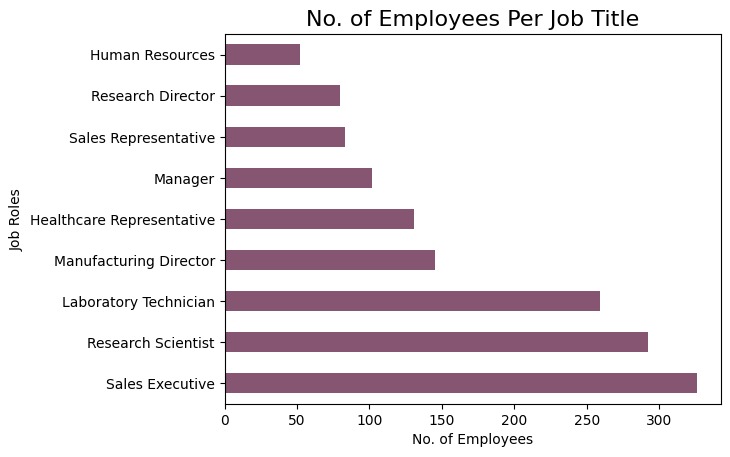

In [27]:
job_role_filter = ea_df['JobRole'].value_counts()
job_role_filter.plot(kind='barh', color='#672A4E', alpha = .8)
#add overall title
plt.title('No. of Employees Per Job Title', fontsize=16)
#add axis titles
plt.xlabel('No. of Employees')
plt.ylabel('Job Roles')
plt.show()

It appears that Laboratory Tehchnician, Sales Executive, and Research Scientist ranked the highest in leaving the company. 

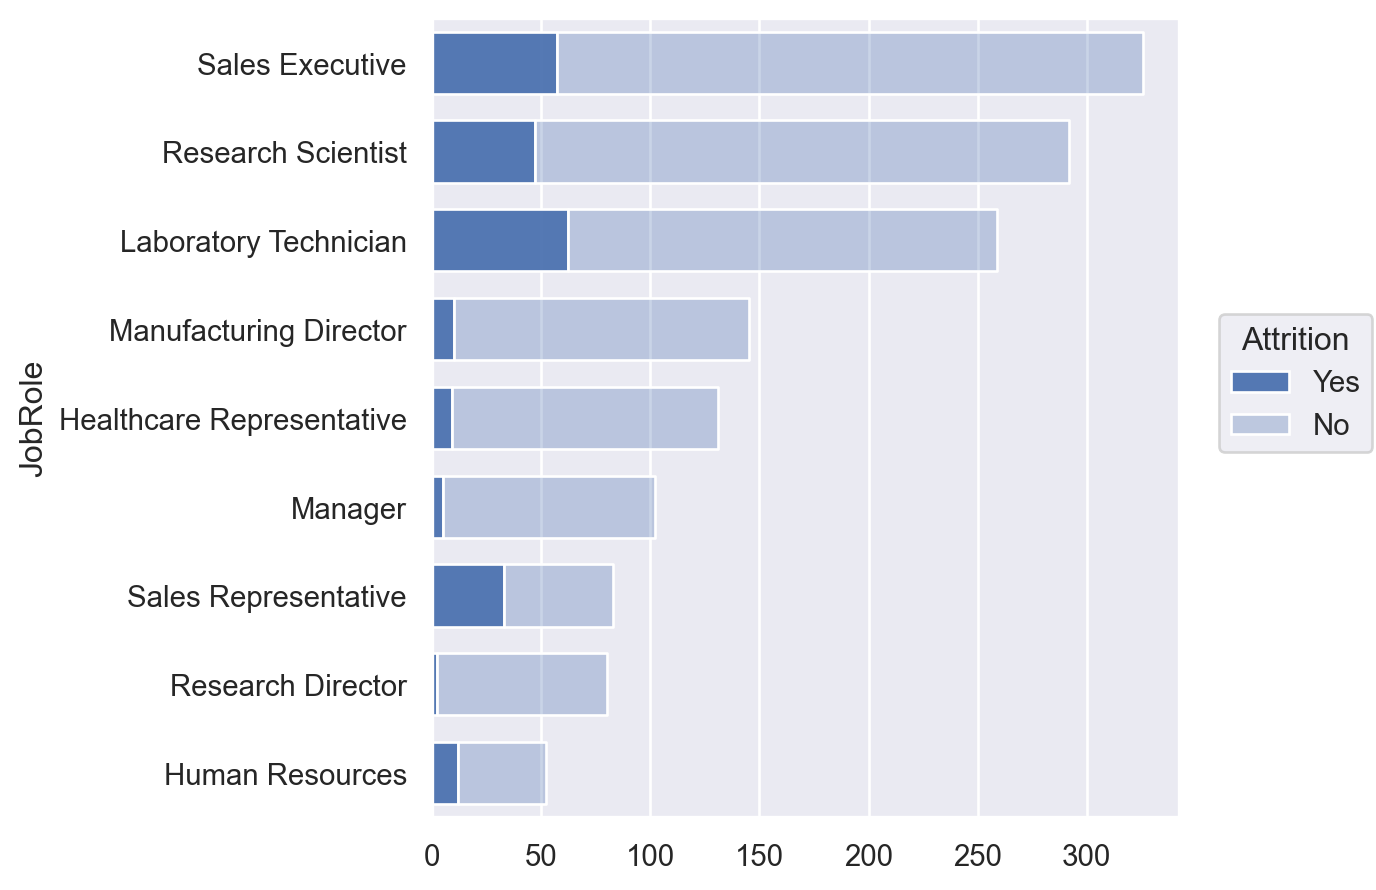

In [28]:
# https://seaborn.pydata.org/generated/seaborn.objects.Stack.html

import seaborn.objects as so
sns.set(style="darkgrid")
so.Plot(ea_df, y="JobRole", alpha="Attrition").add(so.Bars(width=.7), so.Hist(binwidth=10), so.Stack())


In [29]:
jobs_salary_filter = ea_df.loc[:, ['JobRole', 'MonthlyIncome']]



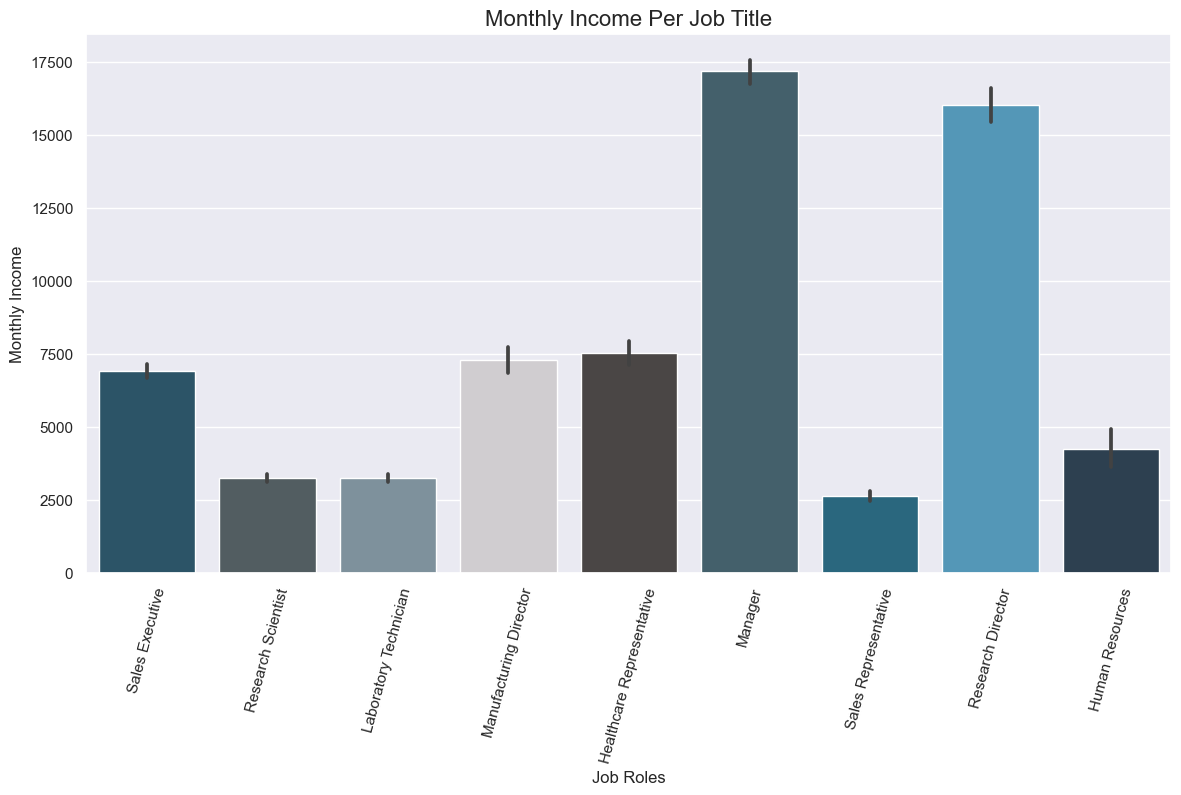

In [56]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(data=jobs_salary_filter, x='JobRole', y='MonthlyIncome', palette=['#225871', '#4F5E64', '#7992A1','#D0CCD0', '#4B4544', '#3E6371', '#1C6E8C', '#439DC7', '#274156'])
#add overall title
plt.title('Monthly Income Per Job Title', fontsize=16)
#add axis titles
plt.xlabel('Job Roles')
plt.ylabel('Monthly Income')
#rotate x-axis labels
plt.xticks(rotation=75)
plt.show()

It appears there is a correlation between the monthly salary and job role that factored in an employee leaving the company. Sales Representatives, Laboratory Technicians, and Research Scientists were compensated the least and were more likely to leave the company.

In [34]:
filtered_women = ea_df['Gender'] == 'Female'


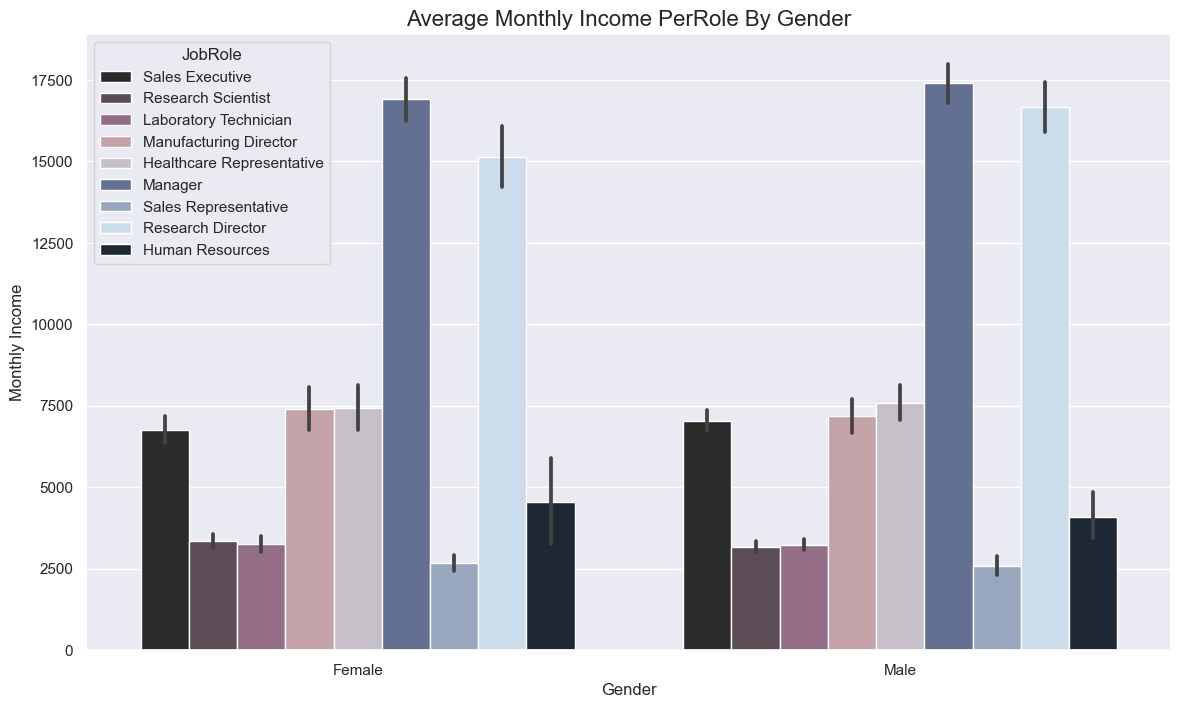

In [55]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(ea_df, y='MonthlyIncome', x='Gender', hue='JobRole', palette=['#2A2B2A', '#5E4955', '#996888','#C99DA3', '#C8BDCA', '#5D6D98', '#92A5C4', '#C6DDF0', '#1A2838'], ax=ax )
#add overall title
plt.title('Average Monthly Income PerRole By Gender', fontsize=16)
#add axis titles
plt.xlabel('Gender')
plt.ylabel('Monthly Income')

plt.show()